# 1. Data Reading

In [7]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in the dataset
telecom_df = pd.read_csv("./telecom_customer_churn_dataset.csv")

# preview the first five rows of the data
telecom_df.head()

,Customer ID,Gender,Age,Tenure in Months,Internet Type,Contract,Payment Method,Monthly Charge,Total Charges,Customer Status
0,0002-ORFBO,Female,37,9,Cable,One Year,Credit Card,65.6,593.30,Stayed
1,0003-MKNFE,Male,46,9,Cable,Month-to-Month,Credit Card,-4.0,542.40,Stayed
2,0004-TLHLJ,Male,50,4,Fiber Optic,Month-to-Month,Bank Withdrawal,73.9,280.85,Churned
3,0011-IGKFF,Male,78,13,Fiber Optic,Month-to-Month,Bank Withdrawal,98.0,1237.85,Churned
4,0013-EXCHZ,Female,75,3,Fiber Optic,Month-to-Month,Credit Card,83.9,267.40,Churned


# 2. Exploratory Data Analysis and Data Cleaning (Data Pre-processing)

In [8]:
# data frame size
telecom_df.shape

(7043, 10)

We could see that we have 7043 rows of data and 10 columns. Let's check what the columns are and their data types. We might need to convert datatypes if possible.

In [9]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   Age               7043 non-null   int64  
 3   Tenure in Months  7043 non-null   int64  
 4   Internet Type     5517 non-null   object 
 5   Contract          7043 non-null   object 
 6   Payment Method    7043 non-null   object 
 7   Monthly Charge    7043 non-null   float64
 8   Total Charges     7043 non-null   float64
 9   Customer Status   7043 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 550.4+ KB


All columns all have the appropriate data types.

In [10]:
# check for duplicate data
telecom_df.duplicated().sum()

0

There was no duplicate found in the dataset, so we are good to continue with our analysis.

## Handling Missing Values and data types

In [12]:
# check for missing values and outliers
telecom_df.isna().sum()

Customer ID            0
Gender                 0
Age                    0
Tenure in Months       0
Internet Type       1526
Contract               0
Payment Method         0
Monthly Charge         0
Total Charges          0
Customer Status        0
dtype: int64

There is a significant amount of missing values in the 'Internet Type' column. We should not drop this as this may impact our analysis. So, we try to find out the cause. Let's begin by printing out the unique value of 'Internet Type'. 

In [13]:
# check the unique values of Internet Type
telecom_df["Internet Type"].unique()

array(['Cable', 'Fiber Optic', 'DSL', nan], dtype=object)

Checking the Metadata of the dataset, we found that the null values represent customers with No Internet Service. So let's fill in the missing values.

In [14]:
# Fill in the missing values 
telecom_df["Internet Type"].fillna("No Internet Service", inplace=True)

In [15]:
# check if the change has been implemented
telecom_df["Internet Type"].unique()

array(['Cable', 'Fiber Optic', 'DSL', 'No Internet Service'], dtype=object)

In [16]:
# confirm again if there are any missing values
telecom_df.isna().sum()

Customer ID         0
Gender              0
Age                 0
Tenure in Months    0
Internet Type       0
Contract            0
Payment Method      0
Monthly Charge      0
Total Charges       0
Customer Status     0
dtype: int64

There are no more duplicate values. Let replace the space in the column names with _ for better reading

In [19]:
# replace the space of the column names with _
telecom_df.columns = telecom_df.columns.str.replace(' ', '_')

# check if this has been done
telecom_df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Tenure_in_Months', 'Internet_Type',
       'Contract', 'Payment_Method', 'Monthly_Charge', 'Total_Charges',
       'Customer_Status'],
      dtype='object')

### Remove CustomerID

The Customer_ID column is not useful to our analysis as it will not help us explain whether a customer will churn. So, we drop this column from the dataset.

In [20]:
# drop the customer_ID column
telecom_df.drop(columns='Customer_ID', inplace=True)
telecom_df.columns

Index(['Gender', 'Age', 'Tenure_in_Months', 'Internet_Type', 'Contract',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Customer_Status'],
      dtype='object')

Next, let see the unique values of each column. Here, we will;

- Calculate basic statistics such as mean, median, and standard deviation for numerical columns.
- Count unique values for categorical columns.
- Identify potential outliers.

In [21]:
# Get statistical information on numerical features
telecom_df.describe()

,Age,Tenure_in_Months,Monthly_Charge,Total_Charges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,32.386767,63.596131,2280.381264
std,16.750352,24.542061,31.204743,2266.220462
min,19.000000,1.000000,-10.000000,18.800000
25%,32.000000,9.000000,30.400000,400.150000
50%,46.000000,29.000000,70.050000,1394.550000
75%,60.000000,55.000000,89.750000,3786.600000
max,80.000000,72.000000,118.750000,8684.800000


We could notice that the Monthly_Charge column has a negative value which is out of the ordinary as it is not likely for the charge by the company to be negative. Let us take a closer look.

In [30]:
# check the number of values that are negative
condition = telecom_df["Monthly_Charge"] < 1
print(telecom_df[condition].shape)

# drop rows based on condition
telecom_df.drop(telecom_df[condition].index, inplace=True)

# confirm it has been dropped
print(telecom_df[condition].shape)

(0, 9)
(0, 9)


In [32]:
# print the shape of the dataset
telecom_df.shape

(6923, 9)

We now have 6923 rows of data and 9 columns

In [23]:
# Loop through each column and get unique values per column
for i in telecom_df.columns:
    print(f"Unique {i}'s count: {telecom_df[i].nunique()}")
    print(f"{telecom_df[i].unique()} \n")

Unique Gender's count: 2
['Female' 'Male'] 

Unique Age's count: 62
[37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 72 79 26 30 22 34 42 64 48
 28 33 31 60 69 20 57 19 38 54 35 51 66 61 24 55 59 71 49 40 21 45 29 62
 76 77 73 41 56 80 63 53 44 70 74 36 27 65] 

Unique Tenure_in_Months's count: 72
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42] 

Unique Internet_Type's count: 4
['Cable' 'Fiber Optic' 'DSL' 'No Internet Service'] 

Unique Contract's count: 3
['One Year' 'Month-to-Month' 'Two Year'] 

Unique Payment_Method's count: 3
['Credit Card' 'Bank Withdrawal' 'Mailed Check'] 

Unique Monthly_Charge's count: 1591
[65.6  -4.   73.9  ... 91.75 68.8  67.85] 

Unique Total_Charges's count: 6540
[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ] 

Unique Customer_Status's count: 3
['Stayed' 'Churned' 'Joined'] 



# 3. Data Visualization

We will create some visualizations to better understand the data:

- Histograms:
We will use histograms to visualize the distribution of numerical variables: Age, Tenure, Monthly Charges, and Total Charges.

- Bar Charts:
We will also create bar charts to visualize the distribution of categorical variables: Gender, Internet Type, Contract Type, Payment Method, and Churn Status.

- Box Plots:
Box plots can help us identify potential outliers in the numerical columns. Although we might have tried to handle outliers previously, creating a visualization will help us see things better

- Correlation Heatmap:
We will also create a correlation heatmap to visualize the relationships between numerical variables if there are any.

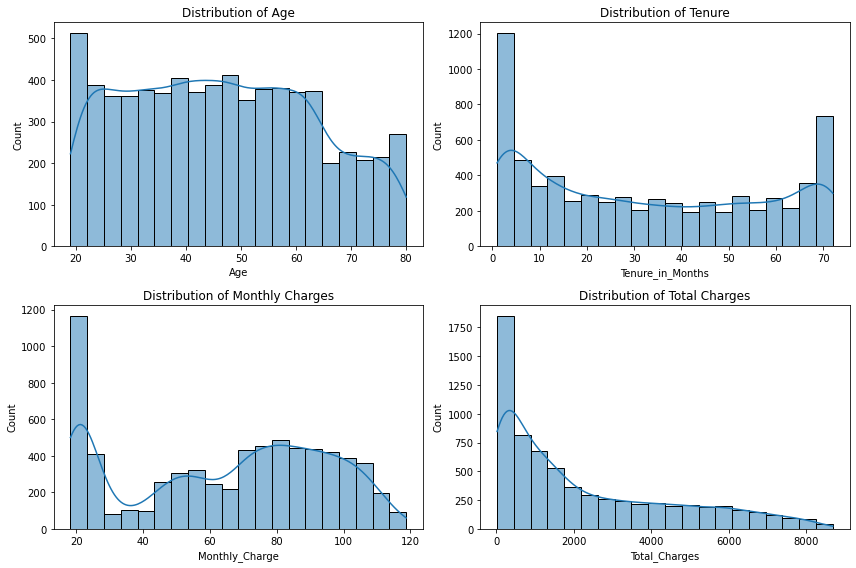

In [79]:
# Create histograms for numerical data using subplots

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data= telecom_df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(data=telecom_df, x='Tenure_in_Months', bins=20, kde=True)
plt.title('Distribution of Tenure')

plt.subplot(2, 2, 3)
sns.histplot(data=telecom_df, x='Monthly_Charge', bins=20, kde=True)
plt.title('Distribution of Monthly Charges')

plt.subplot(2, 2, 4)
sns.histplot(data=telecom_df, x='Total_Charges', bins=20, kde=True)
plt.title('Distribution of Total Charges')

plt.tight_layout()
plt.show()


### Plot Insight:

- From the histogram, we could see that the distribution of Age was almost approximately uniform which means that the customer base spans a wide range of ages, and there's no dominant age group that is significantly overrepresented or underrepresented.

- The right skewed distribution of 'Total Charges' indicates a common trend where the majority of customers make smaller transactions or purchases.

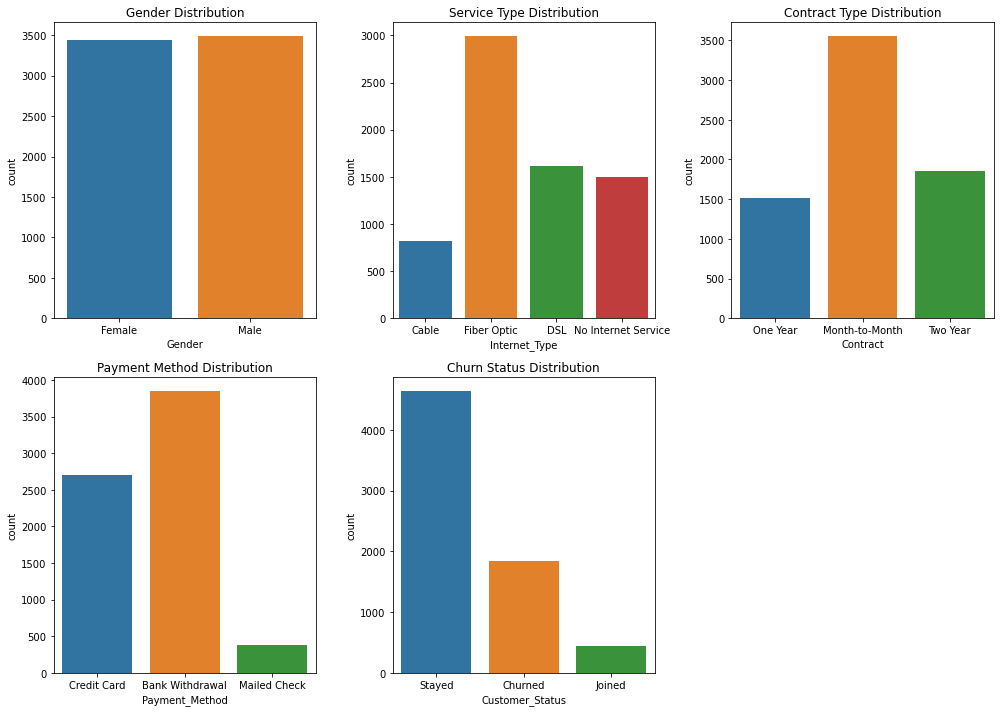

In [80]:
# Create bar plots for Categorical Data
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
sns.countplot(data=telecom_df, x='Gender')
plt.title('Gender Distribution')

plt.subplot(2, 3, 2)
sns.countplot(data=telecom_df, x='Internet_Type')
plt.title('Service Type Distribution')

plt.subplot(2, 3, 3)
sns.countplot(data=telecom_df, x='Contract')
plt.title('Contract Type Distribution')

plt.subplot(2, 3, 4)
sns.countplot(data=telecom_df, x='Payment_Method')
plt.title('Payment Method Distribution')

plt.subplot(2, 3, 5)
sns.countplot(data=telecom_df, x='Customer_Status')
plt.title('Churn Status Distribution')

plt.tight_layout()
plt.show()


### Plot Insight:

- Gender: There is a fairly balanced distribution between male and female customers.

- Internet Type:  Fiber Optic was the most commonly used internet service type.

- Contract Type: A significant number of customers were on Month-to-Month contracts.

- Payment Method: Bank Withdrawal was the most common payment method.


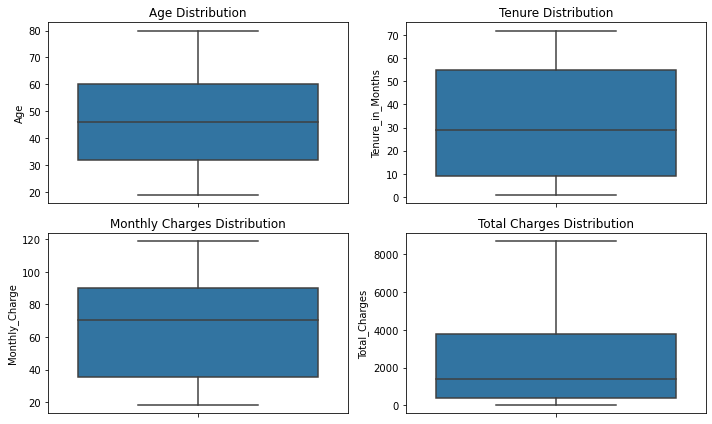

In [42]:
# Create box plots to visualize distribution and potential outliers in the numerical columns
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.boxplot(data=telecom_df, y='Age')
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.boxplot(data=telecom_df, y='Tenure_in_Months')
plt.title('Tenure Distribution')

plt.subplot(2, 2, 3)
sns.boxplot(data=telecom_df, y='Monthly_Charge')
plt.title('Monthly Charges Distribution')

plt.subplot(2, 2, 4)
sns.boxplot(data=telecom_df, y='Total_Charges')
plt.title('Total Charges Distribution')

plt.tight_layout()
plt.show()

We can now confirm that there are no longer outliers in the numerical columns

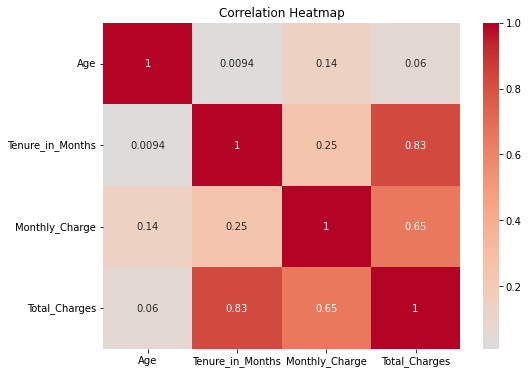

In [81]:
# Create a correlation heatmap using the numerical columns

plt.figure(figsize=(8, 6))
sns.heatmap(telecom_df[['Age', 'Tenure_in_Months', 'Monthly_Charge', 'Total_Charges']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap showed relationships between numerical variables.


No strong correlations were really observed among the numerical variables except between "Tenure in Months" and "Total Charges" (i.e. As there is an increase in number of months used by a customer there is also an increase in the total charges) 

### Next, we calculate the churn rate and we can explore how churn relates to other variables by coming up with some hypotheses

Churn Rate:
 Stayed     66.965189
Churned    26.563628
Joined      6.471183
Name: Customer_Status, dtype: float64


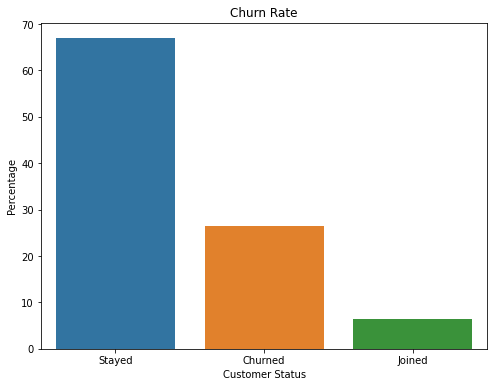

In [82]:
# This calculates the churn rate
churn_rate = telecom_df['Customer_Status'].value_counts(normalize=True) * 100
print("Churn Rate:\n", churn_rate)

# We display a bar plot using the churn rate
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.title('Churn Rate')
plt.ylabel('Percentage')
plt.xlabel('Customer Status')
plt.show()


## Hypothesis Building

We'll perform some basic customer segmentation based on other features in the dataset to see if there are any patterns in churn behavior. The following hypotheses can be made:

- Age and Churn: Younger customers might be more likely to churn due to changing needs or preferences, while older customers might be more stable in their choices.

- Contract Type and Churn: Customers with month-to-month contracts might have a higher churn rate compared to those with longer-term contracts, as they have more flexibility to switch providers.

- Tenure and Churn: Customers with longer tenure might be less likely to churn, indicating a higher level of satisfaction or loyalty due to their established relationship with the service.

- Internet Service and Churn: Customers with Fiber optic internet service might have a higher churn rate compared to DSL users due to potential service quality issues or pricing differences.

- Monthly Charges and Churn: Higher monthly charges might contribute to churn, as customers might be more sensitive to costs and seek more affordable alternatives.

- Total Charges and Churn: Customers with lower total charges might be more likely to churn, as they might not have been satisfied with the value they received over their subscription period.

- Payment Method and Churn: Customers using certain payment methods (e.g., mailed check) might have a higher churn rate, possibly due to inconvenience or dissatisfaction with payment options.

- Gender and Churn: Gender might not strongly correlate with churn, as the decision to churn is likely driven by other factors such as service quality, pricing, and contract terms.

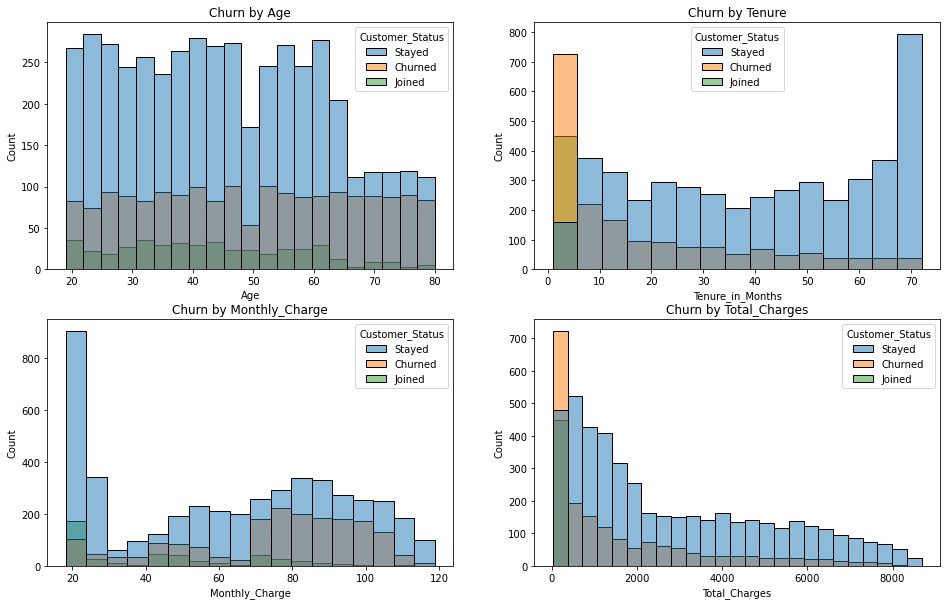

In [83]:
# Create histograms for numerical variables to support or reject the hypothesis
plt.figure(figsize=(16, 10))
    
plt.subplot(2, 2, 1)
sns.histplot(data=telecom_df, x='Age', hue='Customer_Status')
plt.title('Churn by Age')

plt.subplot(2, 2, 2)
sns.histplot(data=telecom_df, x='Tenure_in_Months', hue='Customer_Status')
plt.title('Churn by Tenure')

plt.subplot(2, 2, 3)
sns.histplot(data=telecom_df, x='Monthly_Charge', hue='Customer_Status')
plt.title('Churn by Monthly_Charge')

plt.subplot(2, 2, 4)
sns.histplot(data=telecom_df, x='Total_Charges', hue='Customer_Status')
plt.title('Churn by Total_Charges')

plt.show()


## Hypothesis Check

- Age and Churn: Younger customers might be more likely to churn due to changing needs or preferences, while older customers might be more stable in their choices. ~ REJECT

- Tenure and Churn: Customers with longer tenure might be less likely to churn, indicating a higher level of satisfaction or loyalty due to their established relationship with the service. ~ ACCEPT

- Monthly Charges and Churn: Higher monthly charges might contribute to churn, as customers might be more sensitive to costs and seek more affordable alternatives. ~ REJECT

- Total Charges and Churn: Customers with lower total charges might be more likely to churn, as they might not have been satisfied with the value they received over their subscription period. ~ ACCEPT

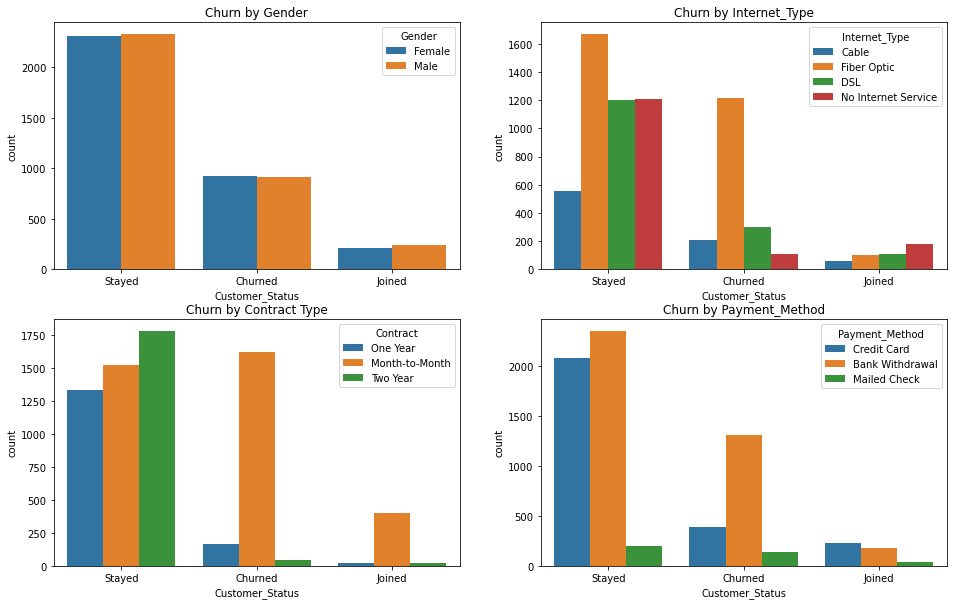

In [84]:
# Create histograms for Categorical variables to support or reject the hypothesis
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.countplot(data=telecom_df, x='Customer_Status', hue='Gender')
plt.title('Churn by Gender')

plt.subplot(2, 2, 2)
sns.countplot(data=telecom_df, x='Customer_Status', hue='Internet_Type')
plt.title('Churn by Internet_Type')

plt.subplot(2, 2, 3)
sns.countplot(data=telecom_df, x='Customer_Status', hue='Contract')
plt.title('Churn by Contract Type')

plt.subplot(2, 2, 4)
sns.countplot(data=telecom_df, x='Customer_Status', hue='Payment_Method')
plt.title('Churn by Payment_Method')

plt.show()


## Hypothesis Check

- Payment Method and Churn: Customers using mailed check have a higher churn rate, possibly due to inconvenience or dissatisfaction with payment options. ~REJECT

- Gender and Churn: Gender might not strongly correlate with churn, as the decision to churn is likely driven by other factors such as service quality, pricing, and contract terms. ~ACCEPT

- Internet Service and Churn: Customers with Fiber optic internet service might have a higher churn rate compared to DSL users due to potential service quality issues or pricing differences. ~ ACCEPT

- Contract Type and Churn: Customers with month-to-month contracts might have a higher churn rate compared to those with longer-term contracts, as they have more flexibility to switch providers. ~ ACCEPT

# Model Selection, Training and Evaluation


Our model selection process will encompass evaluation of potential candidates, including;
logistic regression, K-Nearest Neighbour, decision trees, support vector machine and random forests


The trained model's performance will be  evaluated, employing a battery of comprehensive metrics such as accuracy, precision, recall, and F1-score

In [63]:
# importing the modules from the scikit-learn library for our model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data = telecom_df
# convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=["Internet_Type", "Contract", "Payment_Method", "Gender"], drop_first=True)

# Define features (X) and target (y)
X = data.drop("Customer_Status", axis=1)
y = data["Customer_Status"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=["Churned", "Stayed", "Joined"])
    
    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("="*80)

Model: Random Forest
Accuracy: 0.8282
Classification Report:
               precision    recall  f1-score   support

     Churned       0.68      0.64      0.66       361
      Stayed       0.76      0.58      0.66        88
      Joined       0.88      0.93      0.90       936

    accuracy                           0.83      1385
   macro avg       0.78      0.71      0.74      1385
weighted avg       0.82      0.83      0.82      1385

Model: KNN
Accuracy: 0.7661
Classification Report:
               precision    recall  f1-score   support

     Churned       0.57      0.45      0.50       361
      Stayed       0.64      0.55      0.59        88
      Joined       0.83      0.91      0.87       936

    accuracy                           0.77      1385
   macro avg       0.68      0.63      0.65      1385
weighted avg       0.75      0.77      0.75      1385

Model: Decision Tree
Accuracy: 0.7762
Classification Report:
               precision    recall  f1-score   support

     Ch

C:\Users\ABDULLAHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABDULLAHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABDULLAHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: SVM
Accuracy: 0.7199
Classification Report:
               precision    recall  f1-score   support

     Churned       0.46      0.44      0.45       361
      Stayed       0.00      0.00      0.00        88
      Joined       0.81      0.90      0.85       936

    accuracy                           0.72      1385
   macro avg       0.42      0.44      0.43      1385
weighted avg       0.66      0.72      0.69      1385

Model: Logistic Regression
Accuracy: 0.7899
Classification Report:
               precision    recall  f1-score   support

     Churned       0.62      0.63      0.62       361
      Stayed       0.61      0.43      0.51        88
      Joined       0.86      0.89      0.88       936

    accuracy                           0.79      1385
   macro avg       0.70      0.65      0.67      1385
weighted avg       0.79      0.79      0.79      1385



C:\Users\ABDULLAHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Interpretation
#### Analysis/Insight:
1) Looking at the accuracy values and classification reports for different models, you can compare their performance in terms of correctly predicting each class.

2) Random Forest, Decision Tree, and Logistic Regression seem to have better accuracy and F1-scores across the classes compared to KNN and SVM.

3) For the Churned class, Random Forest and Logistic Regression generally show better performance in terms of precision, recall, and F1-score.

4) Some models, like KNN and SVM, struggle with the "Stayed" class, as indicated by lower precision, recall, and F1-scores for this class.

5) The "Joined" class tends to have higher performance metrics across models, which could indicate that predicting customers who stay with the company is generally easier than predicting churn or customers who join.

6) Overall, Random Forest and Logistic Regression seem to be the better-performing models overall based on the metrics.